# Model selection for outcome prediciton (no surgery)

Date: 9 October 2025<br>
By: Eunhye Yang<br>
Description:<br>
Selecting model using their best performing parameter with cross validation<br>
No significant difference between model performance<br>
Random Forest and Gradient Boosting most probable candidate<br>
Gradient Boosting Classifier chosen due to its precision and recall performance

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_validate, cross_val_score, KFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, precision_recall_curve, confusion_matrix
from scipy.stats import ttest_rel, f_oneway
import seaborn as sns
import matplotlib.pyplot as plt
import random
import joblib

split = 10
train = pd.read_csv('./preprocessing/final_preprocessed_nosurgery_thesis_train.csv')
test = pd.read_csv('./preprocessing/final_preprocessed_nosurgery_thesis_test.csv')

In [2]:
ICHscore_train = train['ICHScore'].copy()
y_train = train['outcomes'].copy()
ICHscore_test = test['ICHScore'].copy()
y_test = test['outcomes'].copy()

# Prepare train
X_train = train.copy()
X_train = X_train.drop('mICHScore', axis=1)
X_train = X_train.drop('ICHScore', axis=1)
X_train = X_train.drop('@6Mmortality', axis=1)
X_train = X_train.drop('outcomes', axis=1)
X_train = X_train.drop('@6MmRS', axis=1)

# Prepare test
X_test = test.copy()
X_test = X_test.drop('mICHScore', axis=1)
X_test = X_test.drop('ICHScore', axis=1)
X_test = X_test.drop('@6Mmortality', axis=1)
X_test = X_test.drop('outcomes', axis=1)
X_test = X_test.drop('@6MmRS', axis=1)

In [3]:
# n, bins, patches = plt.hist([y_train, y_test], bins=7, label=['train', 'test'])
# # plt.xticks([0.33, 1, 1.66], labels=['mRS 0-3', 'mRS 4-5', 'mRS 6'])
# # plt.xticks([0.38, 1.2, 2, 2.8, 3.6], labels=['mRS 0-1', 'mRS 2', 'mRS 3', 'mRS 4', 'mRS 5-6'])
# plt.xticks([0.38, 1.3, 2.1, 3, 3.9, 4.7, 5.6], labels=['mRS 0', 'mRS 1', 'mRS 2', 'mRS 3', 'mRS 4', 'mRS 5', 'mRS 6'])

# for group in range(len(n)):
#     for i in range(len(n[group])):
#         height = n[group][i]
#         bar_center = (bins[i] + bins[i+1]) / 2
#         if len(n) == 2:
#             offset = (-0.13 if group == 0 else 0.13)
#         else: offset = 0
#         plt.text(bar_center + offset, height, str(int(height)), ha='center', va='bottom')
# plt.title('Dataset distribution')
# plt.legend()
# plt.show()

In [4]:
print(np.unique(y_train, return_counts=True))
print(np.unique(y_test, return_counts=True))

(array([0., 1., 2.]), array([209, 200, 150]))
(array([0., 1., 2.]), array([81, 68, 38]))


### Select out the conventional features

In [5]:
# prefixes = [
#     'E subscore',
#     'V subscore',
#     'M subscore',
#     'UL power',
#     'LL power',
#     'CKD class',
#     'location1tha2ICGP3LN4caudate5lobar6brainstem7cerebellum8whitematter',
#     'Laterality (1=L, 2=R, 3=Central)',
#     'GRAEBSCORE'
#     ]

# cols_to_drop = [col for col in X_train.columns if any(col.startswith(prefix) for prefix in prefixes)]

In [6]:
# X_con_train = X_train.copy()
# X_con_train = X_con_train.drop(columns=cols_to_drop, axis=1)
# X_con_test = X_test.copy()
# X_con_test = X_con_test.drop(columns=cols_to_drop, axis=1)

In [7]:
prefixes = [
    'AdmissionGCS',
    'Location0supratentorial1infratentorial',
    'EverIVH',
    ]

cols_to_drop = [col for col in X_train.columns if any(col.startswith(prefix) for prefix in prefixes)]

In [8]:
X_det_train = X_train.copy()
X_det_train = X_det_train.drop(columns=cols_to_drop, axis=1)
X_det_test = X_test.copy()
X_det_test = X_det_test.drop(columns=cols_to_drop, axis=1)

## Initialize KFold

In [9]:
kfold = KFold(n_splits=split, shuffle=False)

## Model initialization

In [10]:
############# Old dataset thesis #############
xgb = XGBClassifier(
    n_estimators=170,
    learning_rate=0.004,
    max_depth=4,
    random_state=42
)
gbc = GradientBoostingClassifier(
    n_estimators=80,
    learning_rate=0.05,
    random_state=42
)
rfc = RandomForestClassifier(
    n_estimators=50,
    min_samples_leaf=6,
    random_state=42
)
############# Old dataset thesis #############

In [11]:
# svm_con = cross_validate(svm, X_con_train, y_train, cv=split, return_estimator=True, verbose=1)
# lsvc_con = cross_validate(lsvc, X_con_train, y_train, cv=split, return_estimator=True, verbose=1)
# rfc_con = cross_validate(rfc, X_con_train, y_train, cv=split, return_estimator=True, verbose=1)
# gbc_con = cross_validate(gbc, X_con_train, y_train, cv=split, return_estimator=True, verbose=1)

In [12]:
# svm_det = cross_validate(svm, X_det_train, y_train, cv=split, return_estimator=True, verbose=1)
# lsvc_det = cross_validate(lsvc, X_det_train, y_train, cv=split, return_estimator=True, verbose=1)
# xgb_det = cross_validate(xgb, X_det_train, y_train, cv=split, return_estimator=True, verbose=1)
# rfc_det = cross_validate(rfc, X_det_train, y_train, cv=split, return_estimator=True, verbose=1)
# gbc_det = cross_validate(gbc, X_det_train, y_train, cv=split, return_estimator=True, verbose=1)
xgb_det = cross_validate(xgb, X_det_train, y_train, cv=kfold, return_estimator=True, verbose=1)
rfc_det = cross_validate(rfc, X_det_train, y_train, cv=kfold, return_estimator=True, verbose=1)
gbc_det = cross_validate(gbc, X_det_train, y_train, cv=kfold, return_estimator=True, verbose=1)

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    6.3s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    4.2s finished


## Cross validation evaluation plots

In [13]:
# fig, ax = plt.subplots(1,2, figsize=(15,5))
# ax[0].boxplot([svm_con['test_score'], lsvc_con['test_score'], rfc_con['test_score'], gbc_con['test_score']])
# ax[0].set_xticks([1,2,3,4], ['SVC linear kernel', 'LinearSVC', 'Random Forest', 'Gradient Boosting'])
# ax[0].set_title('Conventional scoring system')
# ax[1].boxplot([svm_det['test_score'], lsvc_det['test_score'], rfc_det['test_score'], gbc_det['test_score']])
# ax[1].set_xticks([1,2,3,4], ['SVC linear kernel', 'LinearSVC', 'Random Forest', 'Gradient Boosting'])
# ax[1].set_title('Detailed scoring system')
# plt.suptitle('Box plot of cross validation accuracies')
# plt.show()

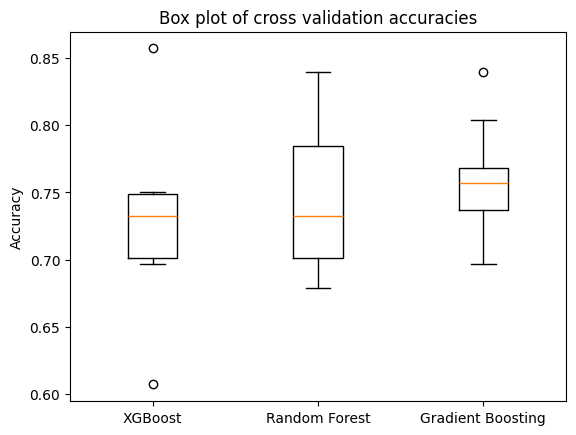

In [14]:
plt.boxplot([xgb_det['test_score'], rfc_det['test_score'], gbc_det['test_score']])
plt.xticks([1,2,3], ['XGBoost', 'Random Forest', 'Gradient Boosting'])
plt.title('Box plot of cross validation accuracies')
plt.ylabel('Accuracy')
plt.savefig('cv_accuracies.png')
plt.show()

In [15]:
# f_oneway(svm_con['test_score'], lsvc_con['test_score'], rfc_con['test_score'], gbc_con['test_score'])

In [16]:
# f_oneway(svm_det['test_score'], lsvc_det['test_score'], rfc_det['test_score'], gbc_det['test_score'])
print(f_oneway(xgb_det['test_score'], rfc_det['test_score'], gbc_det['test_score']))
print(ttest_rel(rfc_det['test_score'], gbc_det['test_score']))

F_onewayResult(statistic=np.float64(0.8300636203907452), pvalue=np.float64(0.4468443538520293))
TtestResult(statistic=np.float64(-1.2481223219816264), pvalue=np.float64(0.2434794887366373), df=np.int64(9))


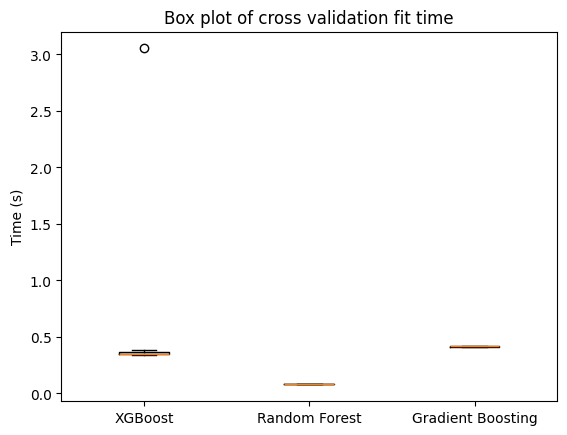

In [17]:
plt.boxplot([xgb_det['fit_time'], rfc_det['fit_time'], gbc_det['fit_time']])
plt.xticks([1,2,3], ['XGBoost', 'Random Forest', 'Gradient Boosting'])
plt.ylabel('Time (s)')
plt.title('Box plot of cross validation fit time')
plt.savefig('cv_fittime.png')
plt.show()

In [18]:
f_oneway(xgb_det['fit_time'], rfc_det['fit_time'], gbc_det['fit_time'])

F_onewayResult(statistic=np.float64(3.087056583248104), pvalue=np.float64(0.062032598161725974))

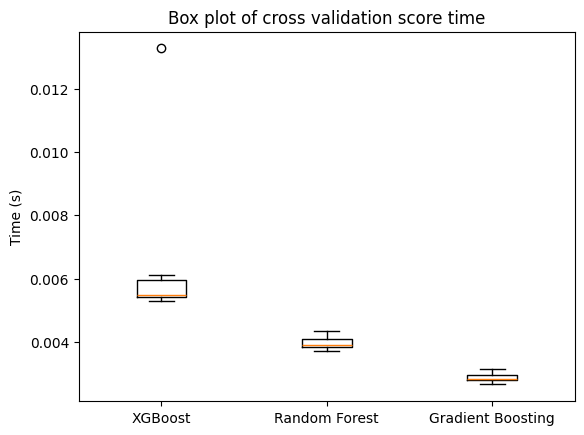

In [19]:
plt.boxplot([xgb_det['score_time'], rfc_det['score_time'], gbc_det['score_time']])
plt.xticks([1,2,3], ['XGBoost', 'Random Forest', 'Gradient Boosting'])
plt.ylabel('Time (s)')
plt.title('Box plot of cross validation score time')
plt.savefig('cv_scoretime.png')
plt.show()

In [20]:
f_oneway(xgb_det['score_time'], rfc_det['score_time'], gbc_det['score_time'])

F_onewayResult(statistic=np.float64(15.686550546580445), pvalue=np.float64(3.0167441232793403e-05))

## Hold-out test comparison

### Ground truth and prediction comparison

In [21]:
xgb_pred = [[] for _ in range(split+1)]
xgb_pred[0] = np.unique(y_test.values, return_counts=True)[1]
rfc_pred = [[] for _ in range(split+1)]
rfc_pred[0] = np.unique(y_test.values, return_counts=True)[1]
gbc_pred = [[] for _ in range(split+1)]
gbc_pred[0] = np.unique(y_test.values, return_counts=True)[1]

for i in range(split):
    xgb_pred[i+1] = np.unique(xgb_det['estimator'][i].predict(X_det_test), return_counts=True)[1]
    rfc_pred[i+1] = np.unique(rfc_det['estimator'][i].predict(X_det_test), return_counts=True)[1]
    gbc_pred[i+1] = np.unique(gbc_det['estimator'][i].predict(X_det_test), return_counts=True)[1]
    # xgb_pred[i+1] = np.unique(xgb_det['estimator'][i].predict(X_test), return_counts=True)[1]
    # rfc_pred[i+1] = np.unique(rfc_det['estimator'][i].predict(X_test), return_counts=True)[1]
    # gbc_pred[i+1] = np.unique(gbc_det['estimator'][i].predict(X_test), return_counts=True)[1]

xgb_pred = pd.DataFrame(xgb_pred, columns=[0, 1, 2]).T
rfc_pred = pd.DataFrame(rfc_pred, columns=[0, 1, 2]).T
gbc_pred = pd.DataFrame(gbc_pred, columns=[0, 1, 2]).T
# xgb_pred = pd.DataFrame(xgb_pred, columns=[0, 1, 2, 3, 4, 5, 6]).T
# rfc_pred = pd.DataFrame(rfc_pred, columns=[0, 1, 2, 3, 4, 5, 6]).T
# gbc_pred = pd.DataFrame(gbc_pred, columns=[0, 1, 2, 3, 4, 5, 6]).T

### Accuracy comparison

In [22]:
# compare = [svm, xgb, rfc, gbc]
con_acc_compare = [[], [], [], []]
det_acc_compare = [[], [], [], []]
for i in range(split):
    # con_acc_compare[0].append(accuracy_score(y_test, svm_con['estimator'][i].predict(X_con_test)))
    # con_acc_compare[1].append(accuracy_score(y_test, lsvc_con['estimator'][i].predict(X_con_test)))
    # con_acc_compare[2].append(accuracy_score(y_test, rfc_con['estimator'][i].predict(X_con_test)))
    # con_acc_compare[3].append(accuracy_score(y_test, gbc_con['estimator'][i].predict(X_con_test)))
    # det_acc_compare[0].append(accuracy_score(y_test, svm_det['estimator'][i].predict(X_det_test)))
    # det_acc_compare[1].append(accuracy_score(y_test, lsvc_det['estimator'][i].predict(X_det_test)))
    det_acc_compare[1].append(accuracy_score(y_test, xgb_det['estimator'][i].predict(X_det_test)))
    det_acc_compare[2].append(accuracy_score(y_test, rfc_det['estimator'][i].predict(X_det_test)))
    det_acc_compare[3].append(accuracy_score(y_test, gbc_det['estimator'][i].predict(X_det_test)))
    # det_acc_compare[1].append(accuracy_score(y_test, xgb_det['estimator'][i].predict(X_test)))
    # det_acc_compare[2].append(accuracy_score(y_test, rfc_det['estimator'][i].predict(X_test)))
    # det_acc_compare[3].append(accuracy_score(y_test, gbc_det['estimator'][i].predict(X_test)))

In [23]:
# fig, ax = plt.subplots(1,2, figsize=(15,5))
# ax[0].boxplot(con_acc_compare)
# ax[0].set_xticks([1,2,3,4], ['SVC linear kernel', 'LinearSVC', 'Random Forest', 'Gradient Boosting'])
# ax[0].set_title('Conventional scoring system')
# ax[1].boxplot(det_acc_compare)
# ax[1].set_xticks([1,2,3,4], ['SVC linear kernel', 'LinearSVC', 'Random Forest', 'Gradient Boosting'])
# ax[1].set_title('Detailed scoring system')
# plt.suptitle('Box plot of hold-out test accuracies')
# plt.show()

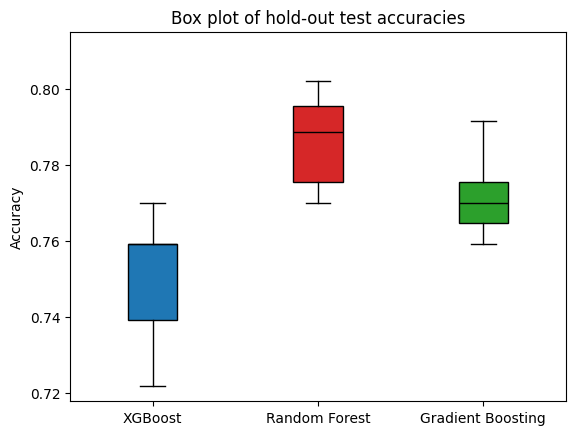

In [24]:
# plt.boxplot([det_acc_compare[1], det_acc_compare[2], det_acc_compare[3]],
#             patch_artist=True,
#             boxprops=dict(facecolor='lightgray', edgecolor='black', linewidth=1),
#             medianprops=dict(color='black', linewidth=1))
colors = ['tab:blue', 'tab:red', 'tab:green']
boxp = plt.boxplot([det_acc_compare[1], det_acc_compare[2], det_acc_compare[3]],
            patch_artist=True, medianprops=dict(color='black', linewidth=1))
for patch, color in zip(boxp['boxes'], colors):
    patch.set_facecolor(color)
plt.xticks([1,2,3], ['XGBoost', 'Random Forest', 'Gradient Boosting'])
plt.ylabel('Accuracy')
plt.ylim(top=0.815)
plt.title('Box plot of hold-out test accuracies')
plt.savefig('hold_out_accuracies.png')
plt.show()

In [25]:
# f_oneway(con_acc_compare[0], con_acc_compare[1], con_acc_compare[2], con_acc_compare[3])
# f_oneway(con_acc_compare[0], con_acc_compare[2], con_acc_compare[3])

In [26]:
# # f_oneway(det_acc_compare[0], det_acc_compare[1], det_acc_compare[2], det_acc_compare[3])
# # f_oneway(det_acc_compare[0], det_acc_compare[2], det_acc_compare[3])
print(f_oneway(det_acc_compare[1], det_acc_compare[2], det_acc_compare[3]))
print(ttest_rel(det_acc_compare[3], det_acc_compare[2]))

F_onewayResult(statistic=np.float64(19.930247718383303), pvalue=np.float64(4.826378146188853e-06))
TtestResult(statistic=np.float64(-2.977301061035011), pvalue=np.float64(0.015517408335206418), df=np.int64(9))


In [27]:
np.mean(det_acc_compare[3])

np.float64(0.7716577540106953)

### Precision comparison

In [28]:
# compare = [svm, xgb, rfc, gbc]
con_pre_compare = [[], [], [], []]
det_pre_compare = [[], [], [], []]
for i in range(split):
    # con_pre_compare[0].append(precision_score(y_test, svm_con['estimator'][i].predict(X_con_test), average='macro'))
    # con_pre_compare[1].append(precision_score(y_test, lsvc_con['estimator'][i].predict(X_con_test), average='macro'))
    # con_pre_compare[2].append(precision_score(y_test, rfc_con['estimator'][i].predict(X_con_test), average='macro'))
    # con_pre_compare[3].append(precision_score(y_test, gbc_con['estimator'][i].predict(X_con_test), average='macro'))
    # det_pre_compare[0].append(precision_score(y_test, svm_det['estimator'][i].predict(X_det_test), average='macro'))
    # det_pre_compare[1].append(precision_score(y_test, lsvc_det['estimator'][i].predict(X_det_test), average='macro'))
    det_pre_compare[1].append(precision_score(y_test, xgb_det['estimator'][i].predict(X_det_test), average='macro'))
    det_pre_compare[2].append(precision_score(y_test, rfc_det['estimator'][i].predict(X_det_test), average='macro'))
    det_pre_compare[3].append(precision_score(y_test, gbc_det['estimator'][i].predict(X_det_test), average='macro'))
    # det_pre_compare[1].append(precision_score(y_test, xgb_det['estimator'][i].predict(X_test), average='macro'))
    # det_pre_compare[2].append(precision_score(y_test, rfc_det['estimator'][i].predict(X_test), average='macro'))
    # det_pre_compare[3].append(precision_score(y_test, gbc_det['estimator'][i].predict(X_test), average='macro'))

In [29]:
# fig, ax = plt.subplots(1,2, figsize=(15,5))
# ax[0].boxplot(con_pre_compare)
# ax[0].set_xticks([1,2,3,4], ['SVC linear kernel', 'LinearSVC', 'Random Forest', 'Gradient Boosting'])
# ax[0].set_title('Conventional scoring system')
# ax[1].boxplot(det_pre_compare)
# ax[1].set_xticks([1,2,3,4], ['SVC linear kernel', 'LinearSVC', 'Random Forest', 'Gradient Boosting'])
# ax[1].set_title('Detailed scoring system')
# plt.suptitle('Box plot of hold-out test precisions')
# plt.show()

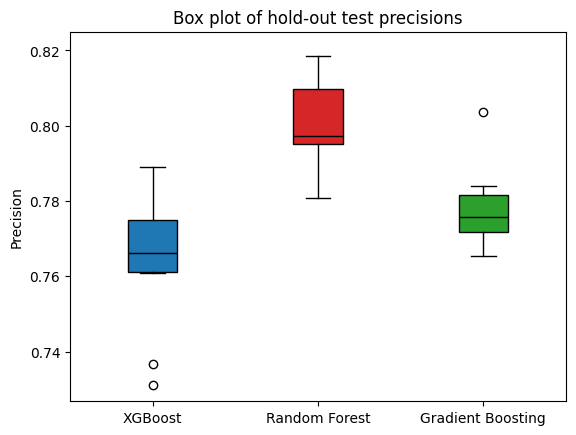

In [33]:
colors = ['tab:blue', 'tab:red', 'tab:green']
boxp = plt.boxplot([det_pre_compare[1], det_pre_compare[2], det_pre_compare[3]],
            patch_artist=True, medianprops=dict(color='black', linewidth=1))
for patch, color in zip(boxp['boxes'], colors):
    patch.set_facecolor(color)
plt.xticks([1,2,3], ['XGBoost', 'Random Forest', 'Gradient Boosting'])
plt.ylabel('Precision')
plt.ylim(top=0.825)
plt.title('Box plot of hold-out test precisions')
plt.savefig('hold_out_precisions.png')
plt.show()

In [31]:
# f_oneway(con_pre_compare[0], con_pre_compare[1], con_pre_compare[2], con_pre_compare[3])
# f_oneway(con_pre_compare[2], con_pre_compare[3])

In [46]:
# f_oneway(det_pre_compare[0], det_pre_compare[1], det_pre_compare[2], det_pre_compare[3])
# f_oneway(det_pre_compare[2], det_pre_compare[3])
print(f_oneway(det_pre_compare[1], det_pre_compare[2], det_pre_compare[3]))
print(ttest_rel(det_pre_compare[2], det_pre_compare[3]))

F_onewayResult(statistic=np.float64(16.88122747413832), pvalue=np.float64(1.7552302825720748e-05))
TtestResult(statistic=np.float64(4.170771251826357), pvalue=np.float64(0.0024088581595238722), df=np.int64(9))


In [33]:
np.mean(det_pre_compare[3])

np.float64(0.7778196024457311)

### Recall comparison

In [31]:
# compare = [svm, xgb, rfc, gbc]
con_rec_compare = [[], [], [], []]
det_rec_compare = [[], [], [], []]
for i in range(split):
    # con_rec_compare[0].append(recall_score(y_test, svm_con['estimator'][i].predict(X_con_test), average='macro'))
    # con_rec_compare[1].append(recall_score(y_test, lsvc_con['estimator'][i].predict(X_con_test), average='macro'))
    # con_rec_compare[2].append(recall_score(y_test, rfc_con['estimator'][i].predict(X_con_test), average='macro'))
    # con_rec_compare[3].append(recall_score(y_test, gbc_con['estimator'][i].predict(X_con_test), average='macro'))
    # det_rec_compare[0].append(recall_score(y_test, svm_det['estimator'][i].predict(X_det_test), average='macro'))
    # det_rec_compare[1].append(recall_score(y_test, lsvc_det['estimator'][i].predict(X_det_test), average='macro'))
    det_rec_compare[1].append(recall_score(y_test, xgb_det['estimator'][i].predict(X_det_test), average='macro'))
    det_rec_compare[2].append(recall_score(y_test, rfc_det['estimator'][i].predict(X_det_test), average='macro'))
    det_rec_compare[3].append(recall_score(y_test, gbc_det['estimator'][i].predict(X_det_test), average='macro'))
    # det_rec_compare[1].append(recall_score(y_test, xgb_det['estimator'][i].predict(X_test), average='macro'))
    # det_rec_compare[2].append(recall_score(y_test, rfc_det['estimator'][i].predict(X_test), average='macro'))
    # det_rec_compare[3].append(recall_score(y_test, gbc_det['estimator'][i].predict(X_test), average='macro'))

In [35]:
# fig, ax = plt.subplots(1,2, figsize=(15,5))
# ax[0].boxplot(con_pre_compare)
# ax[0].set_xticks([1,2,3,4], ['SVC linear kernel', 'LinearSVC', 'Random Forest', 'Gradient Boosting'])
# ax[0].set_title('Conventional scoring system')
# ax[1].boxplot(det_pre_compare)
# ax[1].set_xticks([1,2,3,4], ['SVC linear kernel', 'LinearSVC', 'Random Forest', 'Gradient Boosting'])
# ax[1].set_title('Detailed scoring system')
# plt.suptitle('Box plot of hold-out test recall')
# plt.show()

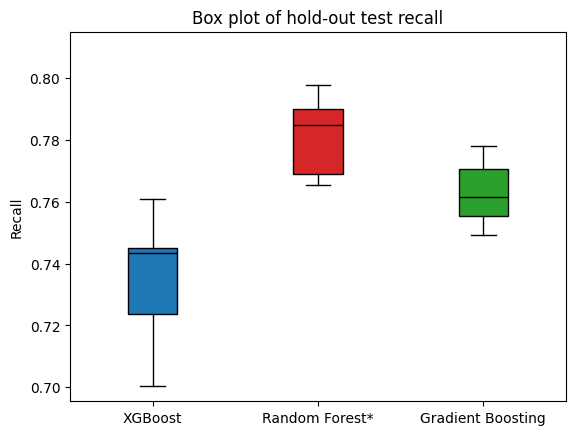

In [36]:
colors = ['tab:blue', 'tab:red', 'tab:green']
boxp = plt.boxplot([det_rec_compare[1], det_rec_compare[2], det_rec_compare[3]],
            patch_artist=True, medianprops=dict(color='black', linewidth=1))
for patch, color in zip(boxp['boxes'], colors):
    patch.set_facecolor(color)
plt.xticks([1,2,3], ['XGBoost', 'Random Forest*', 'Gradient Boosting'])
plt.ylabel('Recall')
plt.ylim(top=0.815)
plt.title('Box plot of hold-out test recall')
plt.savefig('hold_out_recall.png')
plt.show()

In [37]:
# f_oneway(con_rec_compare[0], con_rec_compare[1], con_rec_compare[2], con_rec_compare[3])
# f_oneway(con_rec_compare[2], con_rec_compare[3])

In [37]:
# f_oneway(det_rec_compare[0], det_rec_compare[1], det_rec_compare[2], det_rec_compare[3])
# f_oneway(det_rec_compare[2], det_rec_compare[3])
print(f_oneway(det_rec_compare[1], det_rec_compare[2], det_rec_compare[3]))
print(ttest_rel(det_rec_compare[1], det_rec_compare[2]))
print(ttest_rel(det_rec_compare[1], det_rec_compare[3]))
print(ttest_rel(det_rec_compare[2], det_rec_compare[3]))

F_onewayResult(statistic=np.float64(29.055094487773246), pvalue=np.float64(1.8563498455637047e-07))
TtestResult(statistic=np.float64(-8.71703014628861), pvalue=np.float64(1.107956953150549e-05), df=np.int64(9))
TtestResult(statistic=np.float64(-4.464116854018062), pvalue=np.float64(0.0015679135043968522), df=np.int64(9))
TtestResult(statistic=np.float64(3.463364029032206), pvalue=np.float64(0.007122910440070279), df=np.int64(9))


In [39]:
np.mean(det_rec_compare[3])

np.float64(0.7625756475429679)

In [40]:
# rfc_det['estimator'][0].feature_names_in_[np.argmax(rfc_det['estimator'][0].feature_importances_)]
# gbc_det['estimator'][0].feature_names_in_[np.argmax(gbc_det['estimator'][0].feature_importances_)]

In [41]:
gbc_det['estimator'][0].feature_importances_

array([2.15152603e-01, 4.70298437e-04, 0.00000000e+00, 8.12264987e-03,
       5.50365713e-04, 1.64877089e-03, 2.04042705e-03, 3.00836570e-01,
       2.69082862e-02, 3.39214677e-02, 2.97071232e-02, 1.73862579e-01,
       1.86247274e-02, 2.52013907e-02, 1.86525018e-02, 6.25170613e-03,
       8.86674726e-02, 1.93371486e-02, 1.37044072e-04, 1.80939545e-04,
       1.04435612e-04, 5.97322766e-04, 1.93280664e-03, 3.30977813e-03,
       3.27306455e-03, 0.00000000e+00, 4.63642998e-03, 5.51911117e-03,
       1.95364430e-03, 5.57944010e-04, 2.08354972e-03, 5.92566893e-04,
       1.74766228e-03, 3.41755985e-03, 0.00000000e+00, 5.18063621e-08,
       0.00000000e+00])

In [42]:
gbc_det['estimator'][0].feature_names_in_

array(['Age', 'Sex0female1male', 'Race0chinese1nonchinese', 'DM0no1yes',
       'ISTIA', 'ICH0no1yes', 'Atrialfibirllation', 'Esubscore',
       'Vsubscore', 'Msubscore', 'ULpower', 'LLpower',
       'AdmissionsystolicBP', 'AdmissiondiastolicBP',
       'Admissionpulserate', 'CKDclass', 'LARGESTICHVOLUME', 'GRAEBSCORE',
       'Anticoagulant0no1warfarin2NOAC0',
       'Anticoagulant0no1warfarin2NOAC1',
       'Anticoagulant0no1warfarin2NOAC2',
       'Statin0no1Simva2Atorva3Rovu4others0',
       'Statin0no1Simva2Atorva3Rovu4others1',
       'Statin0no1Simva2Atorva3Rovu4others2',
       'Statin0no1Simva2Atorva3Rovu4others3',
       'Statin0no1Simva2Atorva3Rovu4others4',
       'location0tha1ICGP2LN3caudate4lobar5occipital6brainstem7cerebe0',
       'location0tha1ICGP2LN3caudate4lobar5occipital6brainstem7cerebe1',
       'location0tha1ICGP2LN3caudate4lobar5occipital6brainstem7cerebe2',
       'location0tha1ICGP2LN3caudate4lobar5occipital6brainstem7cerebe3',
       'location0tha1ICGP2LN3c

In [43]:
# def specificity_score(y_true, y_pred):
#     specificities = []
#     cm = confusion_matrix(y_true, y_pred)

#     for i in range(cm.shape[0]):
#         tn = np.sum(np.delete(np.delete(cm, i, axis=0), i, axis=1))
#         fp = np.sum(np.delete(cm[i, :], i))
#         specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
#         specificities.append(specificity)
    
#     return specificities

In [44]:
# for i in range(10):
#     rfc_con[1].append(rfc_con[0][i].predict(X_con_test))
#     rfc_det[1].append(rfc_det[0][i].predict(X_det_test))
#     gbc_con[1].append(gbc_con[0][i].predict(X_con_test))
#     gbc_det[1].append(gbc_det[0][i].predict(X_det_test))

# for i in range(10):
#     rfc_con[2].append(accuracy_score(y_con_test, rfc_con[1][i]))
#     rfc_con[3].append(precision_score(y_con_test, rfc_con[1][i], average='macro'))
#     rfc_con[4].append(recall_score(y_con_test, rfc_con[1][i], average='macro'))
#     rfc_con[5].append(specificity_score(y_con_test, rfc_con[1][i]))
#     rfc_det[2].append(accuracy_score(y_det_test, rfc_det[1][i]))
#     rfc_det[3].append(precision_score(y_det_test, rfc_det[1][i], average='macro'))
#     rfc_det[4].append(recall_score(y_det_test, rfc_det[1][i], average='macro'))
#     rfc_det[5].append(specificity_score(y_det_test, rfc_det[1][i]))
#     gbc_con[2].append(accuracy_score(y_con_test, gbc_con[1][i]))
#     gbc_con[3].append(precision_score(y_con_test, gbc_con[1][i], average='macro'))
#     gbc_con[4].append(recall_score(y_con_test, gbc_con[1][i], average='macro'))
#     gbc_con[5].append(specificity_score(y_con_test, gbc_con[1][i]))
#     gbc_det[2].append(accuracy_score(y_det_test, gbc_det[1][i]))
#     gbc_det[3].append(precision_score(y_det_test, gbc_det[1][i], average='macro'))
#     gbc_det[4].append(recall_score(y_det_test, gbc_det[1][i], average='macro'))
#     gbc_det[5].append(specificity_score(y_det_test, gbc_det[1][i]))

In [45]:
# for i in range(2, 5):
#     rfc_con[6].append(np.std(rfc_con[i]))
#     rfc_det[6].append(np.std(rfc_det[i]))
#     gbc_con[6].append(np.std(gbc_con[i]))
#     gbc_det[6].append(np.std(gbc_det[i]))